In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset with PassengerId as index**

In [99]:
data = pd.read_csv('/content/titanic_dataset.csv', index_col = 'PassengerId')

In [100]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Basic Details**

In [101]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking for null values**

In [102]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [103]:
data.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Replacing null values with mode**

In [104]:
for i in ['Age', 'Cabin', 'Embarked']:
  data[i] = data[i].fillna(data[i].mode().iloc[0])

In [105]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Detecting and handiling outliers**

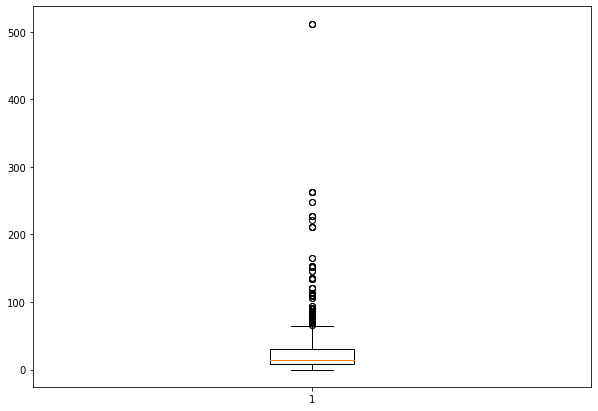

In [106]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['Fare'])
plt.show()

In [107]:
Fare_Outlier= data[data['Fare'] > 300]
Fare_Outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


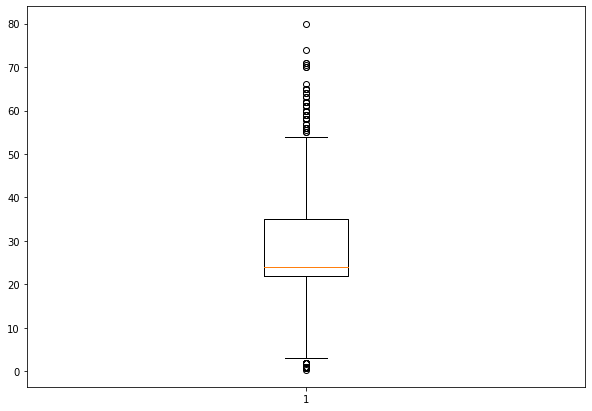

In [108]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['Age'])
plt.show()

In [109]:
Age_Outlier= data[data['Age'] > 70]
Age_Outlier

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96 B98,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96 B98,S


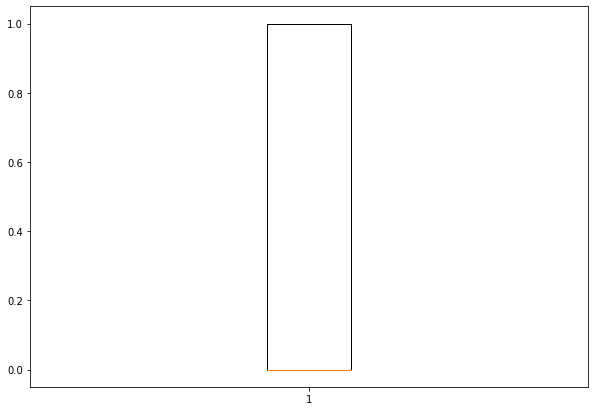

In [110]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['Survived'])
plt.show()

In [111]:
data['Parch']

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [112]:
data['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

**Min-Max Scaling**

In [113]:
x = data.drop('Survived', axis = 1)

In [114]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [115]:
y = data['Survived']

In [116]:
x1 = x.drop(['Pclass', 'Name', 'Sex', 'Parch', 'SibSp','Ticket', 'Cabin', 'Embarked'], axis=1)

In [117]:
x1

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500
...,...,...
887,27.0,13.0000
888,19.0,30.0000
889,24.0,23.4500


In [118]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
x1 = min_max.fit_transform(x1)

In [119]:
x1

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.2963056 , 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

In [120]:
x1 = pd.DataFrame(x1)

In [121]:
x1.columns = ['Age', 'Fare']

In [123]:
x1.index = x1.index + 1

In [124]:
x1

,Age,Fare
1,0.271174,0.014151
2,0.472229,0.139136
3,0.321438,0.015469
4,0.434531,0.103644
5,0.434531,0.015713
...,...,...
887,0.334004,0.025374
888,0.233476,0.058556
889,0.296306,0.045771
890,0.321438,0.058556


In [125]:
x = x.drop(['Age', 'Fare'], axis=1)

In [126]:
x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,B96 B98,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,B96 B98,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
5,3,"Allen, Mr. William Henry",male,0,0,373450,B96 B98,S
...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,0,0,211536,B96 B98,S
888,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,B96 B98,S


In [127]:
x = pd.concat([x, x1],axis = 1)

In [128]:
x

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age,Fare
1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,B96 B98,S,0.271174,0.014151
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,0.472229,0.139136
3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,B96 B98,S,0.321438,0.015469
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,0.434531,0.103644
5,3,"Allen, Mr. William Henry",male,0,0,373450,B96 B98,S,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,0,0,211536,B96 B98,S,0.334004,0.025374
888,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B42,S,0.233476,0.058556
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,B96 B98,S,0.296306,0.045771
890,1,"Behr, Mr. Karl Howell",male,0,0,111369,C148,C,0.321438,0.058556
